<a href="https://colab.research.google.com/github/Pallav-Lama/deeplearning-projects/blob/main/DataAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
roses = list(data_dir.glob('*roses/*.jpg'))

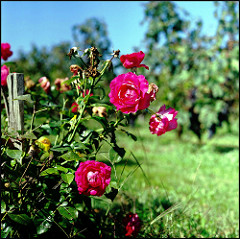

In [ ]:
PIL.Image.open(str(roses[1]))

In [ ]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*'))
}

In [ ]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4
}

In [ ]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img/255)
    y.append(flowers_labels_dict[flower_name])

In [ ]:
X[:1]

[array([[[0.4627451 , 0.43529412, 0.30588235],
         [0.34509804, 0.37254902, 0.2       ],
         [0.17254902, 0.3254902 , 0.14901961],
         ...,
         [0.54117647, 0.45882353, 0.35294118],
         [0.48235294, 0.34901961, 0.29019608],
         [0.39607843, 0.20784314, 0.21960784]],
 
        [[0.43921569, 0.40392157, 0.27058824],
         [0.23529412, 0.31372549, 0.1372549 ],
         [0.13333333, 0.30980392, 0.14117647],
         ...,
         [0.60392157, 0.51372549, 0.40392157],
         [0.51764706, 0.40784314, 0.33333333],
         [0.42745098, 0.25098039, 0.23921569]],
 
        [[0.39607843, 0.36862745, 0.19215686],
         [0.16862745, 0.28235294, 0.12156863],
         [0.12156863, 0.30196078, 0.13333333],
         ...,
         [0.63529412, 0.53333333, 0.41960784],
         [0.56862745, 0.45098039, 0.36470588],
         [0.45098039, 0.29019608, 0.28235294]],
 
        ...,
 
        [[0.54117647, 0.52941176, 0.38431373],
         [0.48627451, 0.48627451, 0.33725

In [ ]:
y[:5]

[0, 0, 0, 0, 0]

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
len(X_train)

2936

In [ ]:
X_train[0].shape

(180, 180, 3)

In [ ]:
num_classes = 5
model = Sequential([
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
model.fit(X_train, y_train, epochs = 10)

In [ ]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 9s 372ms/step - loss: 1.8607 - accuracy: 0.6553


[1.8607001304626465, 0.6553133726119995]

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal', input_shape = (180, 180, 3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),

])

In [ ]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('model.h5', monitor = 'loss', save_best_only = True) #save best model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 5) #avoids overfitting
callbacks = [model_checkpoint, early_stopping]

In [ ]:
num_classes = 5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
])
model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 30, callbacks = callbacks)

Epoch 1/30
92/92 [==============================] - 127s 1s/step - loss: 1.3191 - accuracy: 0.4264
Epoch 2/30
92/92 [==============================] - 125s 1s/step - loss: 1.0656 - accuracy: 0.5739
Epoch 3/30
92/92 [==============================] - 126s 1s/step - loss: 0.9278 - accuracy: 0.6420
Epoch 4/30
92/92 [==============================] - 128s 1s/step - loss: 0.8542 - accuracy: 0.6710
Epoch 5/30
92/92 [==============================] - 120s 1s/step - loss: 0.7976 - accuracy: 0.6982
Epoch 6/30
92/92 [==============================] - 122s 1s/step - loss: 0.7658 - accuracy: 0.7132
Epoch 7/30
92/92 [==============================] - 120s 1s/step - loss: 0.7420 - accuracy: 0.7129
Epoch 8/30
92/92 [==============================] - 122s 1s/step - loss: 0.6884 - accuracy: 0.7411
Epoch 9/30
92/92 [==============================] - 121s 1s/step - loss: 0.6615 - accuracy: 0.7527
Epoch 10/30
92/92 [==============================] - 121s 1s/step - loss: 0.6505 - accuracy: 0.7469
Epoch 11/

In [ ]:
model.evaluate(X_test, y_test)

23/23 [==============================] - 9s 383ms/step - loss: 0.8714 - accuracy: 0.7439


[0.8714168071746826, 0.7438691854476929]